Intercepto (b0): 6.122
Coeficiente (b1): 0.016
R²: 0.059
MSE: 0.682


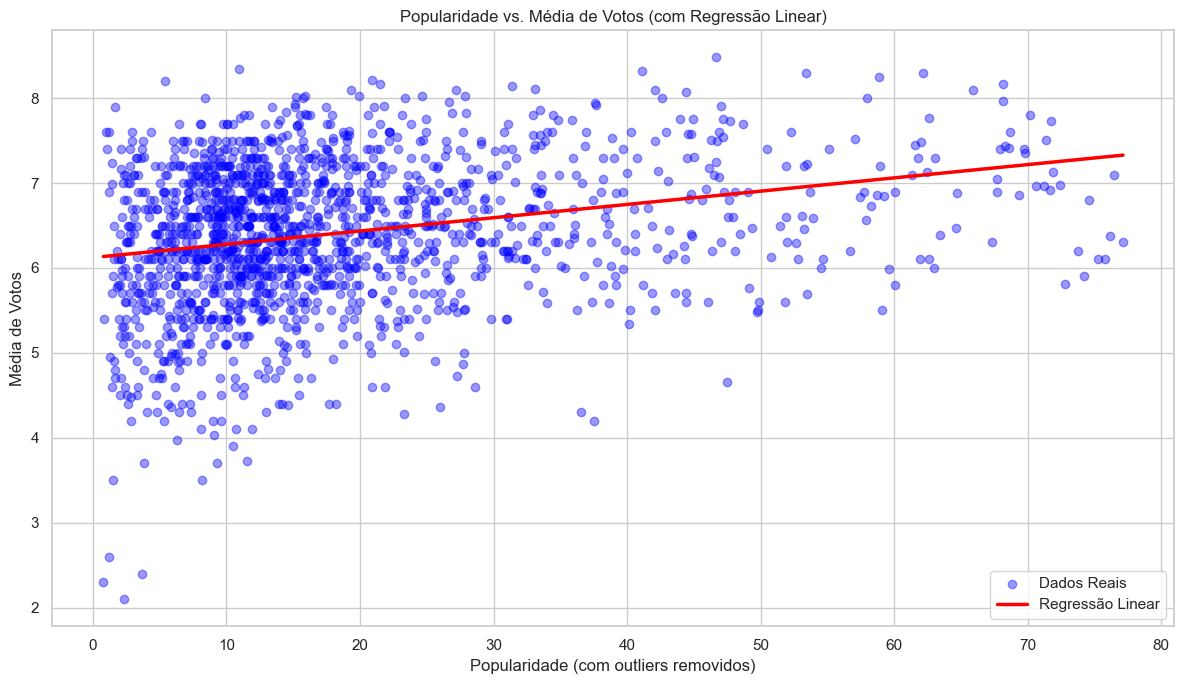

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. Carregar os dados
df = pd.read_csv('filmes_filtrados_sem_nulos.csv')

# 2. Remover outliers de popularidade para melhorar visualização (percentil 95)
limite_superior = df['popularity'].quantile(0.95)
df_filtrado = df[df['popularity'] <= limite_superior]

# 3. Definir variáveis
X = df_filtrado[['popularity']]
y = df_filtrado['vote_average']

# 4. Treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Regressão
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 6. Avaliação
intercept = model.intercept_
coefficient = model.coef_[0]
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Intercepto (b0): {intercept:.3f}')
print(f'Coeficiente (b1): {coefficient:.3f}')
print(f'R²: {r2:.3f}')
print(f'MSE: {mse:.3f}')

# 7. Gráfico com dados ordenados
# Ordena os dados para que a linha fique contínua
sorted_idx = X_test['popularity'].argsort()
X_sorted = X_test.iloc[sorted_idx]
y_test_sorted = y_test.iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

plt.figure(figsize=(12, 7))
plt.scatter(X_test, y_test, color='blue', alpha=0.4, label='Dados Reais')
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2.5, label='Regressão Linear')
plt.title('Popularidade vs. Média de Votos (com Regressão Linear)')
plt.xlabel('Popularidade (com outliers removidos)')
plt.ylabel('Média de Votos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
